**<h1 style="text-align: center;">Stroke Prediction Project</h1>**

## 👋🏼 **Introduction**

<p style="text-align: justify;">I am a data scientist for a company called TrackFit. And it is building an application which tracks the health data for the user. And they are planning to add an additonal function where it will take some inputs and track the body mass index and based on these features it will try to predict whether user has chances of getting a stroke or not. Strokes are one of the many comman cause of deaths. The aim of our company is reduce the number of deaths that are caused due to heart stroke. But giving this stroke prediction function to the user, we are make the user beware of the potential harm and inform him/her to get a doctors opinion at the earliest, which will result is reducing the cause of deaths.The aim is to reduce the rate and scale at which the death is hapening in the recent years. By building this model we go one step forward towards achiving that</p>

## 🧿 **Objective**
 <p style="text-align: justify;">Then objective of this project is I will build a module which will try to find chances of an user for getting a hear stroke. For this my company are given me a dataset which has many metrics which has impact on the cause of stroke. So I will be using these features and building an accurate machine learning model. I have specified the steps we will be following in the **Table of content** so that it will be easier to navigate. Firstly I will be going through the full dataset and trying to understand dataset and see if I can see any anomaly or problems in our dataset. Based on that I will be modifying my dataset. And then I will check if our dataset is balanced and if there a requirement to increase the dataset so that our model can learn better from the data. And then I will choose the best performing model to build my final model with best suited parameters.
 
 </p>

**About the data**  
This dataset contains 12 columns. This data set is from Kaggle. You can [**click here**](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset) to view the dataset on kaggle.

## **Table of Content**

##### ⬇ [**Importing Libraries**](#library)
##### 📊 [**Importing Dataset**](#dataset)
##### 🗺️ [**Exploring the dataset**](#exploration)
##### 💭 [**My taughts on the dataset**](#thoughts)
##### ⚙️ [**Pre-processing the data**](#processing)
##### 🔧 [**Feature Engineering**](#feature)
##### 🗂️ [**Selecting the best model for our dataset**](#selection)
##### ✅ [**Assessing which gives us the best results**](#assess)
##### 🎛️ [**Hyper-Parameter Tuning**](#tuning)
##### 🏁 [**Final Model**](#Final)
##### 💡 [**Conclusion**](#conclusion)


## ***Let's begin....***

<a id='library'></a>
## ⬇ <span style="color: #20479b; font-weight: bold;">Importing Libraries</span>

I start by importing the necessary libraries for my Exploratory Data Analysis tasks in Python.

In [88]:
import   pandas as  pd
import warnings
import    numpy as  np
import sklearn.model_selection
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from    sklearn.preprocessing import   OneHotEncoder
from   sklearn.preprocessing import StandardScaler
from    sklearn.compose import  ColumnTransformer
from  imblearn.over_sampling import SMOTE
from  sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm  import SVC
from sklearn.ensemble   import RandomForestClassifier
from sklearn.tree  import   DecisionTreeClassifier   
import sklearn.metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from  sklearn.metrics import roc_auc_score
from  sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

<a id='dataset'></a>  

## 📊 <span style="color: #20479b; font-weight: bold;">Importing Dataset</span>

In [89]:
dataset = pd.read_csv('/Users/jasonjoelpinto/Documents/GitHub/python-datascience-projects/010. stroke_prediction/dataset/healthcare-dataset-stroke-data.csv')

print("No. of rows.   :", dataset.shape[0])
print("No. of cols.   :", dataset.shape[1])  
print("="*30)

dataset.rename( columns = {
                                'id':'identity',
                                'gender':'sex',
                                'hypertension': 'high_blood_pressure',
                                'heart_disease':'cardiovascular_disease' ,
                                'ever_married':'marrital_status' ,   
                                'work_type':'profession' ,
                                'Residence_type':'stay',
                                'avg_glucose_level':'blood_sugar_level' ,
                                'bmi':'body_mass_index' ,
                                'smoking_status':'tobaco_use' }
                                ,inplace=True)

dataset.sample(1)

No. of rows.   : 5110
No. of cols.   : 12


,identity,sex,age,high_blood_pressure,cardiovascular_disease,marrital_status,profession,stay,blood_sugar_level,body_mass_index,tobaco_use,stroke
4664,37507,Female,32.0,0,0,No,Private,Rural,68.72,25.1,never smoked,0


Here I have renamed the column for better visiblity and understanding. we can also see a sample of our data. We have columns identity, sex, age, high_blood_pressure, cardiovascular_disease, marrital_status, profession, stay, blood_sugar_level, body_mass_index, tobaco_use and our target label stroke.

<a id='exploration'></a>
## 🗺️ <span style="color: #20479b; font-weight: bold;">Exploring the dataset</span>

**Note:**
For EDA and Data Pre-processing I will be using the main datafram. Once dataframe is cleaned. I will be splitting it into `train` and  `test` split. Here's why
1. I do not want the just the `test` data to be cleaned and `train` data having unwanted data and error.
2. If I clean only the `test` data then my data is not generalized. Hence while my model tries to predict it will have different issues during training and testing.

After loading the dataset into the DataFrame `dataset`, I will check the `dataset` shape using the `.shape` attribute.

In [90]:
dataset.shape

(5110, 12)

As you can see above there are 5110 rows and 12 columns. Which is a good sized dataset for my analysis. let see further what all characteristics can I find from this dateset.

Null values can make my model perform very poorly. So, I will check if there are null values, I will also be checking what percentage of each column has null values.
Now I am going to check how much percentage of the columns are null. If they are negligible percentage then we can just drop the columns. Otherwise I will fill the na values with the meaninfull values.

In [91]:
null_percentage = {}
for column in dataset:
    null_percentage[column] = round(( ( dataset[column].isnull().sum() ) / len(dataset)) * 100,2)
np_df = pd.DataFrame( list( null_percentage.items() ),  columns=[  'column_name'  , 'null_percentage' ])
np_df

,column_name,null_percentage
0,identity,0.00
1,sex,0.00
2,age,0.00
3,high_blood_pressure,0.00
4,cardiovascular_disease,0.00
5,marrital_status,0.00
6,profession,0.00
7,stay,0.00
8,blood_sugar_level,0.00
9,body_mass_index,3.93


Here I can see that the for most of the columns there are no null values. We can see that only for `body_mass_index` column. And the percentage of the null values is less than 4% of the total rows. As the null percentage of column `body_mass_index` is negligible when compared to the size of the dataset, I will drop these null rows as body mass index cannot be `NULL`. Because `body_mass_index` of an indivisual can never be null. Hence I think it's better that I delete this rows having data as `null`.

Now I want to make sure that there is no duplicate entries in the datset. If there are any I will be deleting those because deplicates are just going to confuse my model.
Using `.duplicated().any()` I will be checking if there are any duplicate entries.

In [92]:
dataset.duplicated().any()

False

There are no duplicates. Duplicates show false, that means we do not have to worry about the duplicates.

Now I want to plot an histagram of age.

<Axes: xlabel='age', ylabel='Count'>

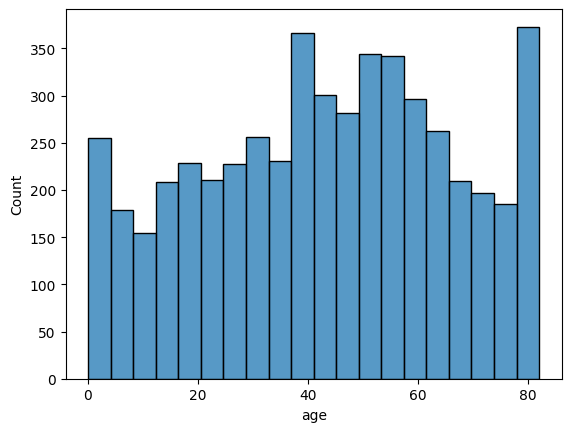

In [93]:
sns.histplot(dataset, x='age')

Here I can see that data in terms of age looks balanced. There is records for all age groups. This is essential for that our model can analyses enough data so that it can provide us acuurate output.
but I can see there is a gap near 0. Which makes me think if there are records for 0 age in this dataset.  

Now let's me check if there is data for age less than 1 years.

In [94]:
print(dataset[dataset['age']<1].shape)
print('='*30)

(43, 12)


There are 42 rows. Okay I am thinnking of chinking the `body_mass_index` column of the dataset. Because I think if the datset is of children under the age of 1 then `body_mass_index` will be less thatn 20 usually. I can also check their profession to confirm too. Let's check if all the records `profession` is children.

In [95]:
print(dataset[dataset['age']<1].equals(dataset[(dataset['age']<1) & (dataset['profession'] == 'children')]))
print('='*30)
dataset.loc[dataset['age']<1,['body_mass_index']].mean()

True


body_mass_index    18.17619
dtype: float64

My doubt is cleared. It looks like the data of the childerens under the age of 1. Because the `body_mass_index` is less than 19 and also the profession is mentioned as `childeren`.
As you can both the dataframes match and also teh body mass index ais less is very less. Hence we I think that records are for infants. So we need not delete these.

Text(0.5, 1.0, 'marrital_status')

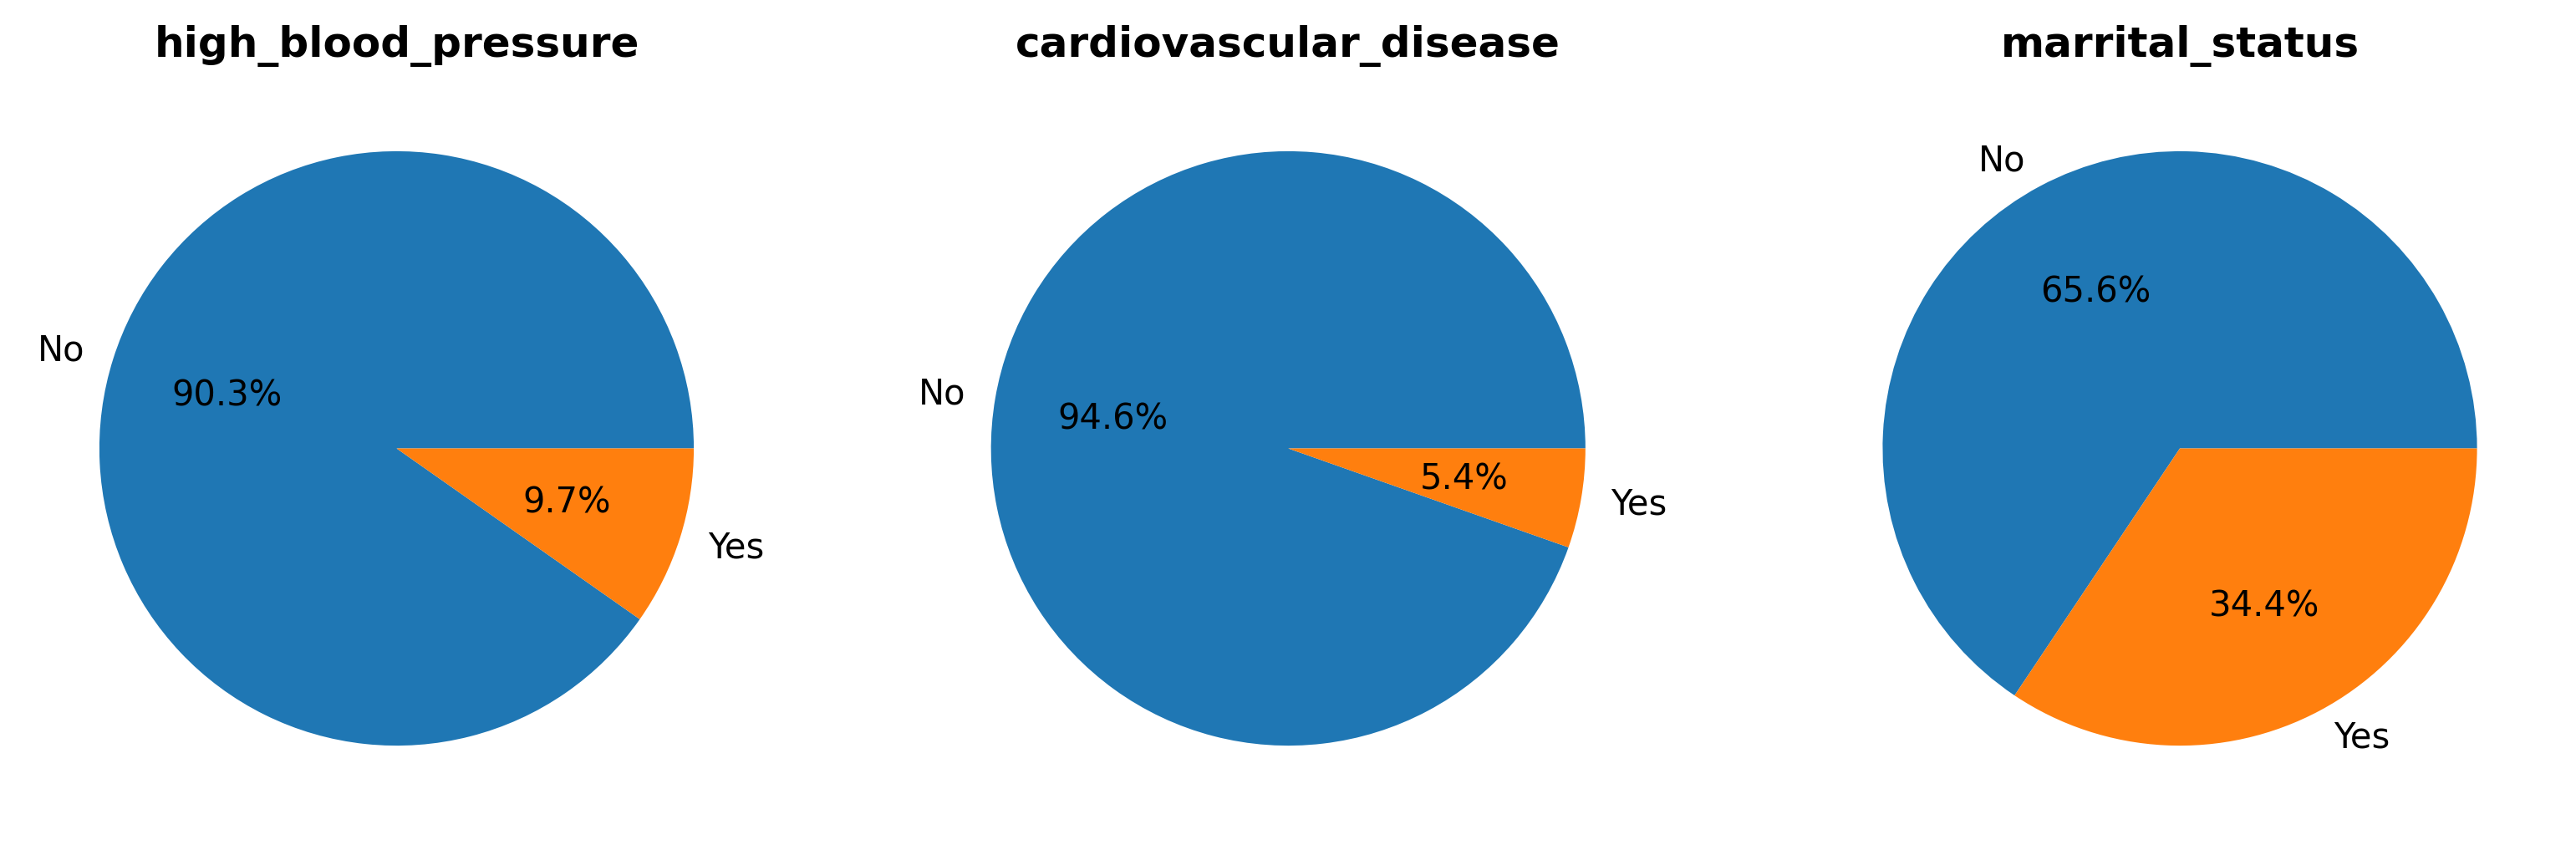

In [96]:
jsn, (s1,s2,s3) = plt.subplots(1,3, figsize=(13, 6), dpi=300)

propotion = dataset['high_blood_pressure'].value_counts()
names = ['No','Yes']
s1.pie(propotion, labels=names, autopct='%1.1f%%')
s1.set_title('high_blood_pressure', fontweight='bold')

propotion = dataset['cardiovascular_disease'].value_counts()
names = ['No','Yes']
s2.pie(propotion, labels=names, autopct='%1.1f%%')
s2.set_title('cardiovascular_disease', fontweight='bold')

propotion = dataset['marrital_status'].value_counts()
names = ['No','Yes']
s3.pie(propotion, labels=names, autopct='%1.1f%%')
s3.set_title('marrital_status', fontweight='bold')

okay, so simplify the view , I have plotted it next to each other. `high_blood_pressure`, We can see that not many have problems of BP. Only 1/10th of the people are having high blood pressure.  And when I check the cardiovascular disease column, it is good to see than only 5 percent of the people are having hearth related diseased and the rest are not having any  heart related problems. And in our 3rd figure I can see than more than 30 percent of our data are married. 

So according to all these study, we can see that
1. **high_blood_pressure:** Only 9.2% of all the people have high_blood_pressure problem.
2. **Heart Disease:** About 95.0% of all the people do not have Heart Disease problem.
3. **Married:** About 34.7% are married.


Text(0.5, 1.0, 'Proportion for stroke column')

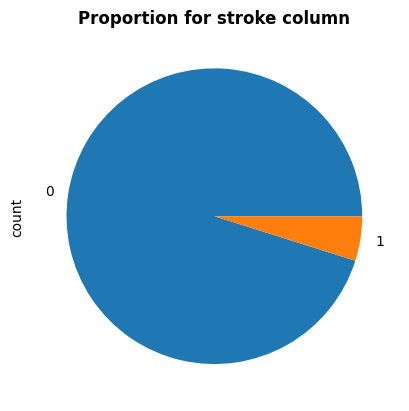

In [97]:
dataset['stroke'].value_counts().plot(kind='pie')
plt.title('Proportion for stroke column', fontweight='bold')

Here you can see that the `data is imbalanced`. This is not good for us as the model will need a very level dataset so than it can learn and understand the complexities better. Now especially since we are focussing on stroke detection we have very less data for people you got stroke. So it is important now for us that we need to equalise data for people who have stroke and those who did not get stroke.

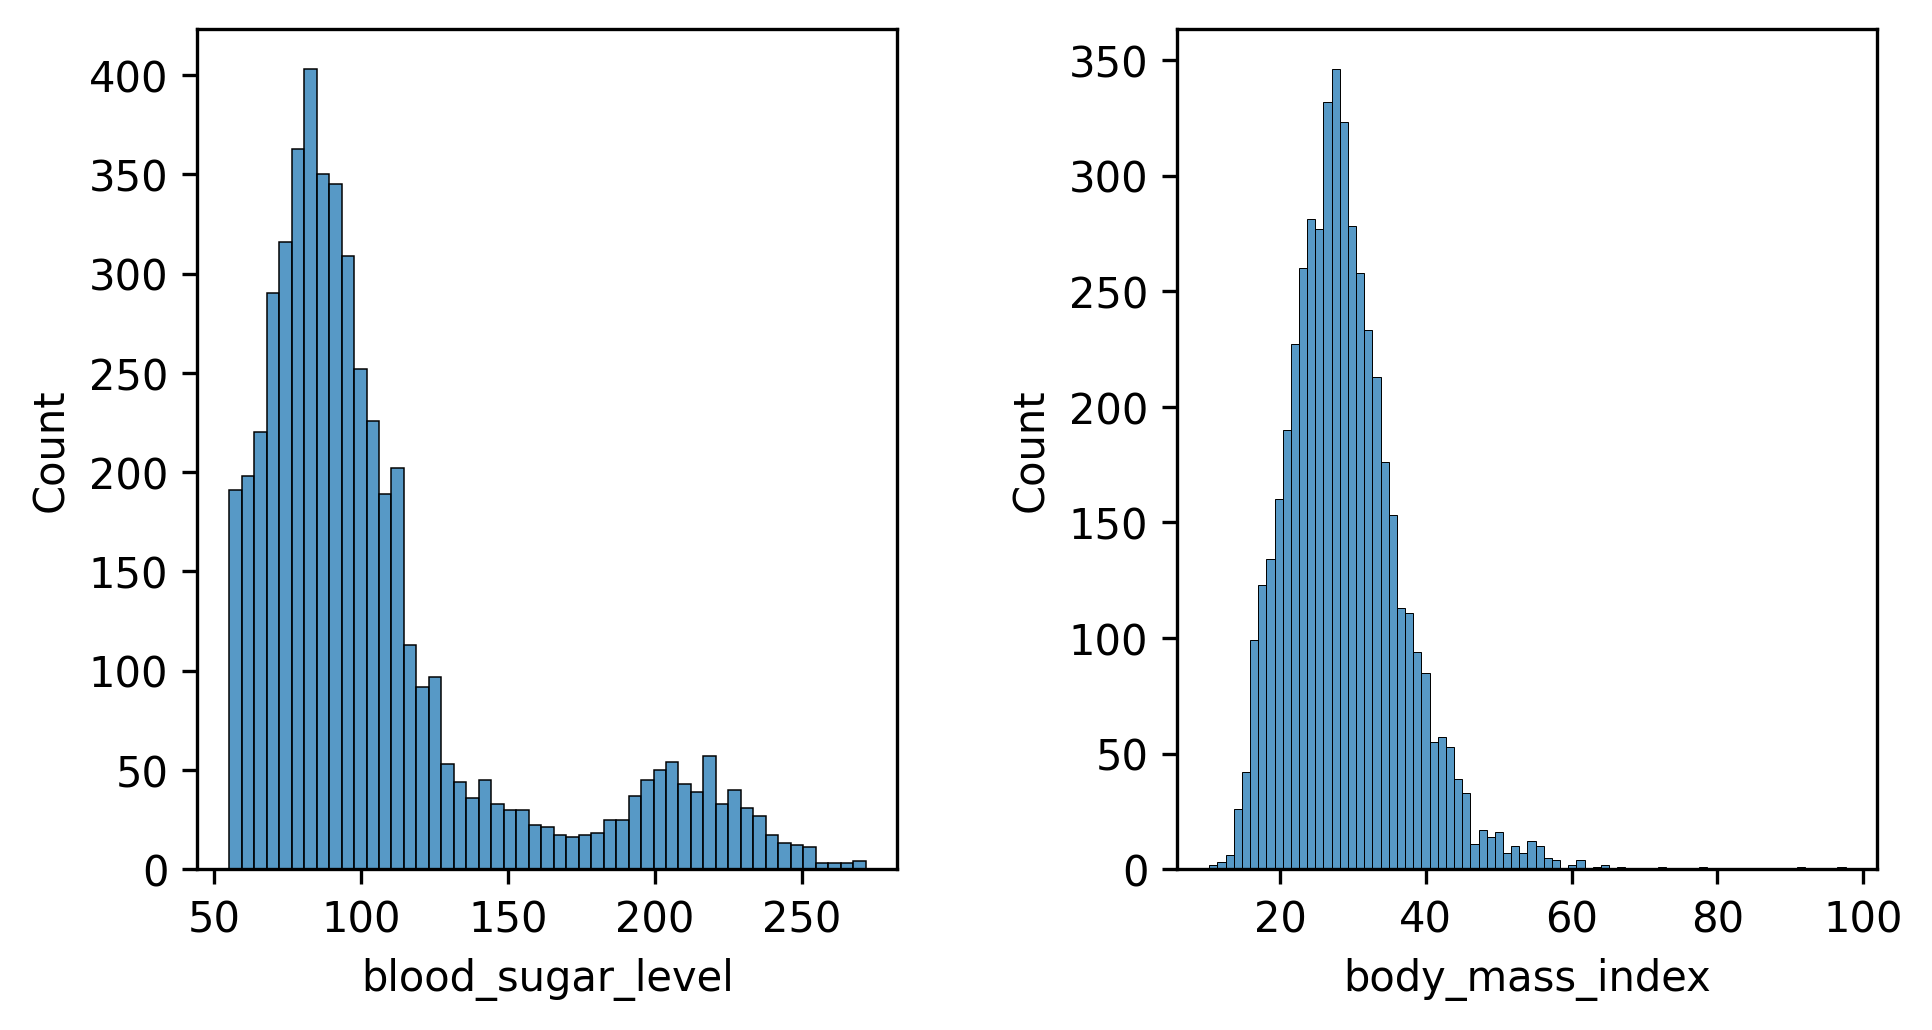

In [98]:
jsn, ( s1, s2) = plt.subplots( 1,  2, figsize=( 8,  4), dpi=300)

sns.histplot(data=dataset, x="blood_sugar_level", ax=s1)
sns.histplot(data=dataset, x="body_mass_index", ax=s2)
plt.subplots_adjust(left=0.1, right=0.8, top=0.8, bottom=0.1, wspace=0.4)

plt.show()

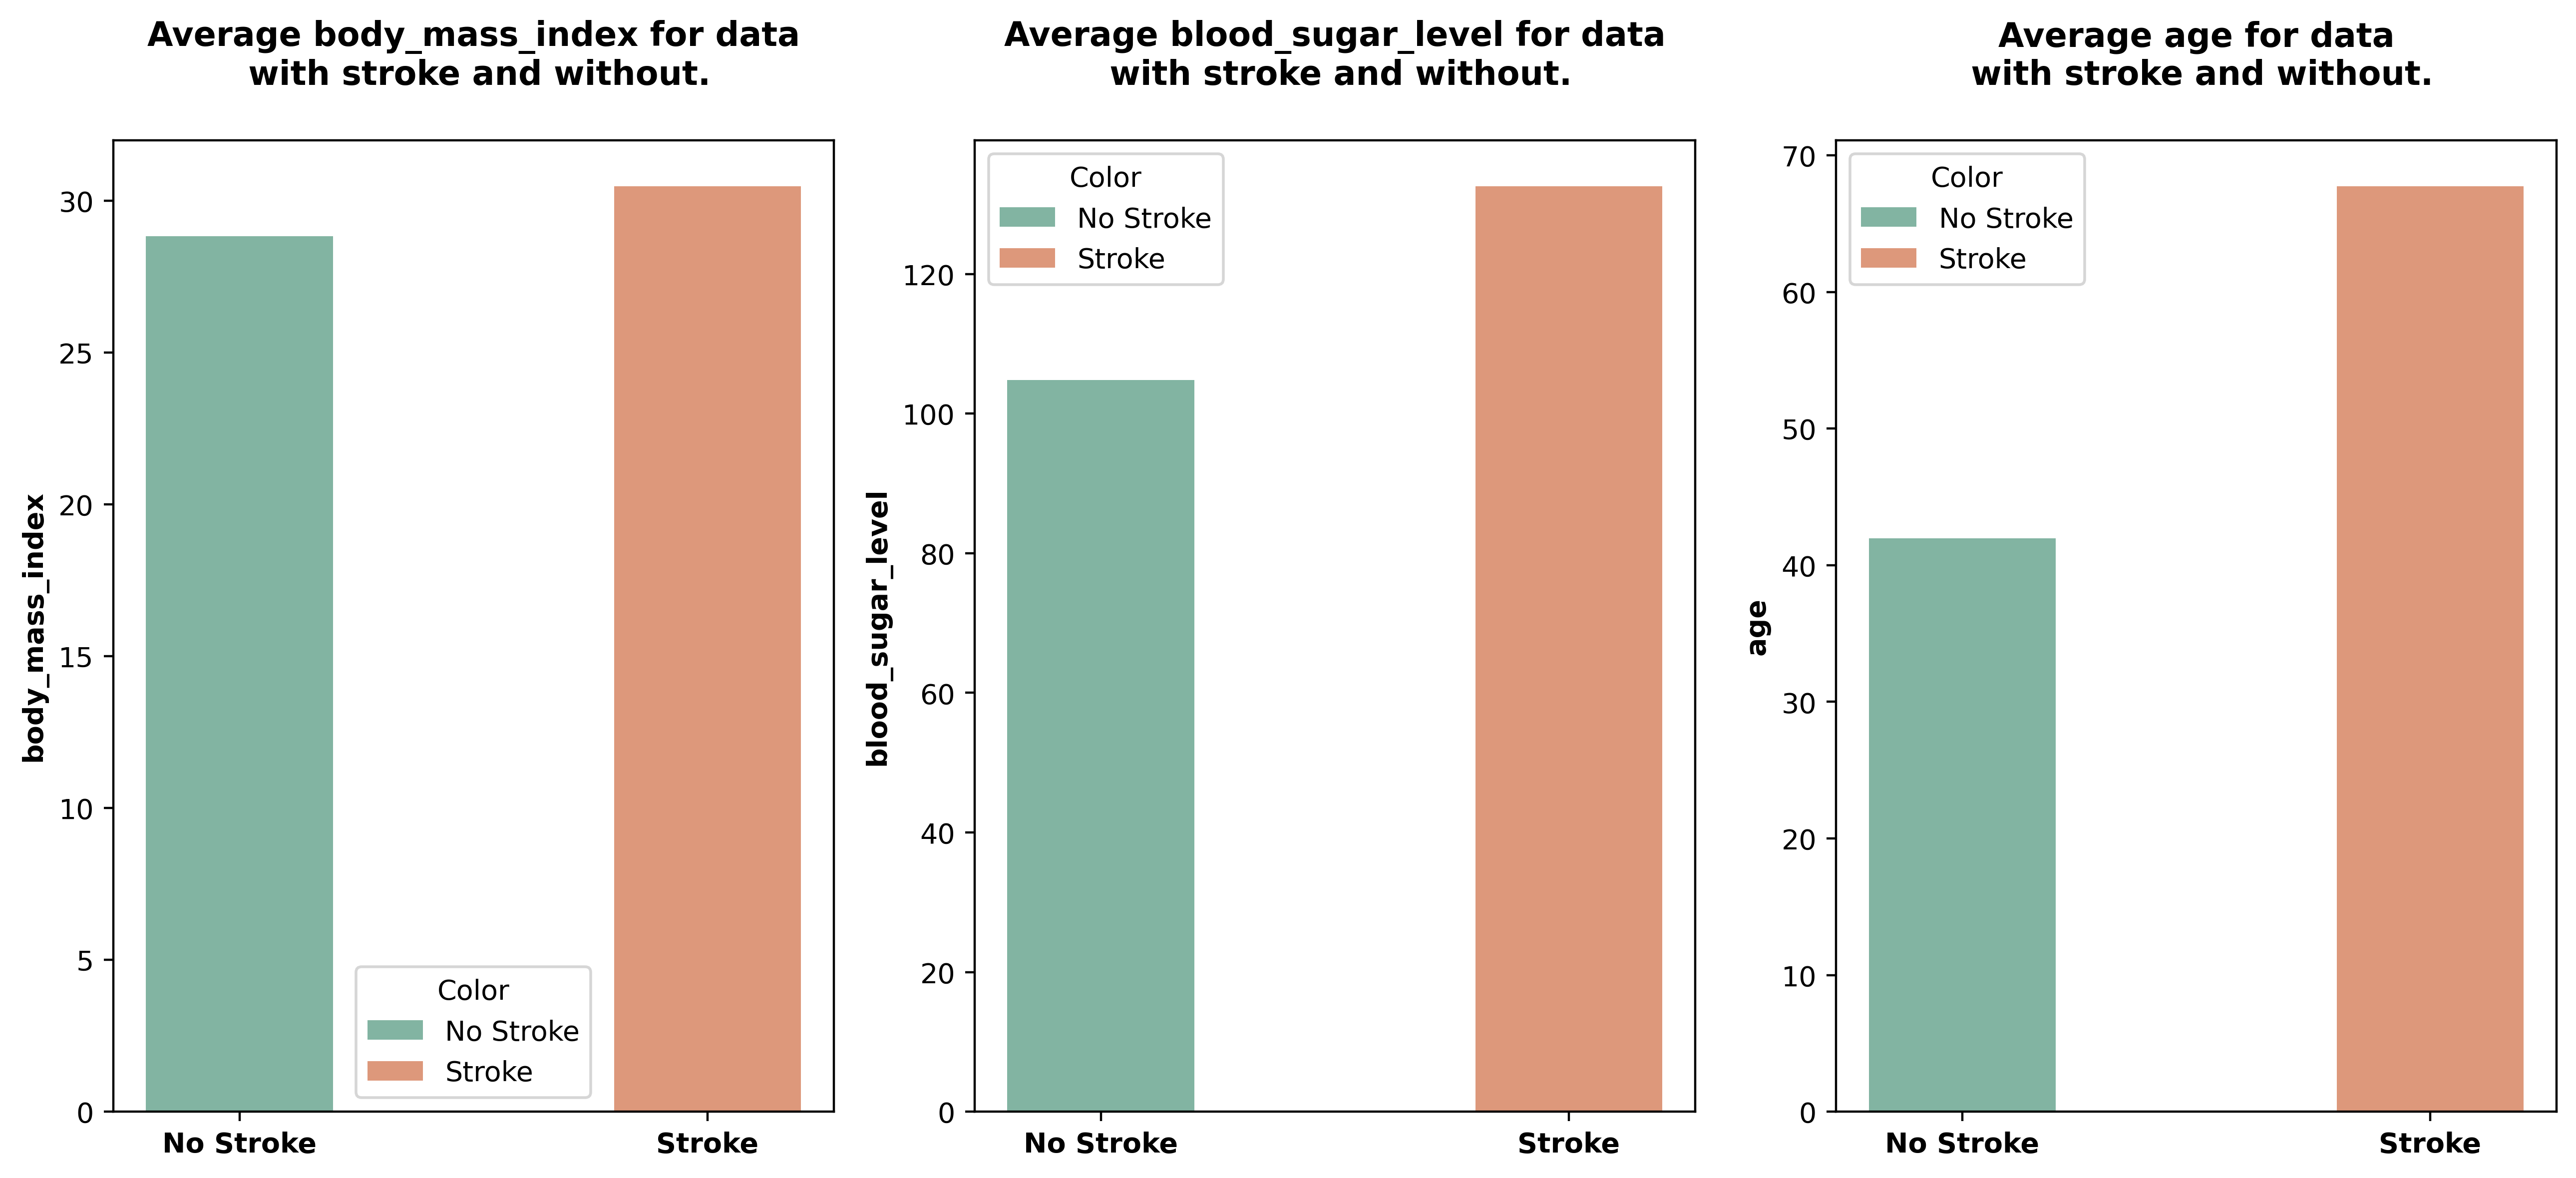

In [99]:
avg_of_numerical_cols = dataset.groupby('stroke')[['body_mass_index', 'blood_sugar_level', 'age']].mean().reset_index()
names = ['No Stroke',  'Stroke']
colors = ['#82b4a2',   '#dd987b']
barwidth = 0.4

fig, p = plt.subplots(1, 3, figsize=(13, 6), dpi=400)

for i, col in enumerate(['body_mass_index', 'blood_sugar_level', 'age']):
    x = avg_of_numerical_cols['stroke']
    y = avg_of_numerical_cols[col]

    p[i].bar(x,  y, label=names,  color =  colors, width =  barwidth, capstyle='round')
    p[i].set_title(f'Average {col} for data\n with stroke and without.', fontweight ='bold', pad  =20)
    p[i].set_ylabel(col , fontweight='bold')
    p[i].set_xticks(x)
    p[i].set_xticklabels(names, fontweight='bold')
    p[i].legend(title='Color'  )


plt.subplots_adjust( left = 0.0, right=2.4, top=1, bottom=0.1, wspace=0.5)
plt.tight_layout(  )
plt.show( )

Here mainly we need to focus on both 🟠 `orange` and 🟢 `green` bar.

In this graph we try to find relationship between numerical columns and their effect on having stroke. here we learn that
We can see that the relationship between `body_mass_index` and having a stroke is very minimal. On an average people whose `body_mass_index` is below 28 chances of having a stroke is very less. And for people whose `body_mass_index` is more than that more is looks more likely.

Comparitively, looks like `blood_sugar_level` has more impact on the likelyhood of having a stroke. For people whose `blood_sugar_level` is more than 120 they are likely to get a stroke. On the other hand for people with levels in an arround 100 are less likely.

In the third figure we can see that it has significact impact on the likelyhood of having a stroke. old aged people arround the age of 64 years are likely to get stroke compared to others.

Features that `have less impact` on our target label are:
1. **body_mass_index**

Features which `have significant impact` on our target label are:
1. **blood_sugar_level**
2. **age**

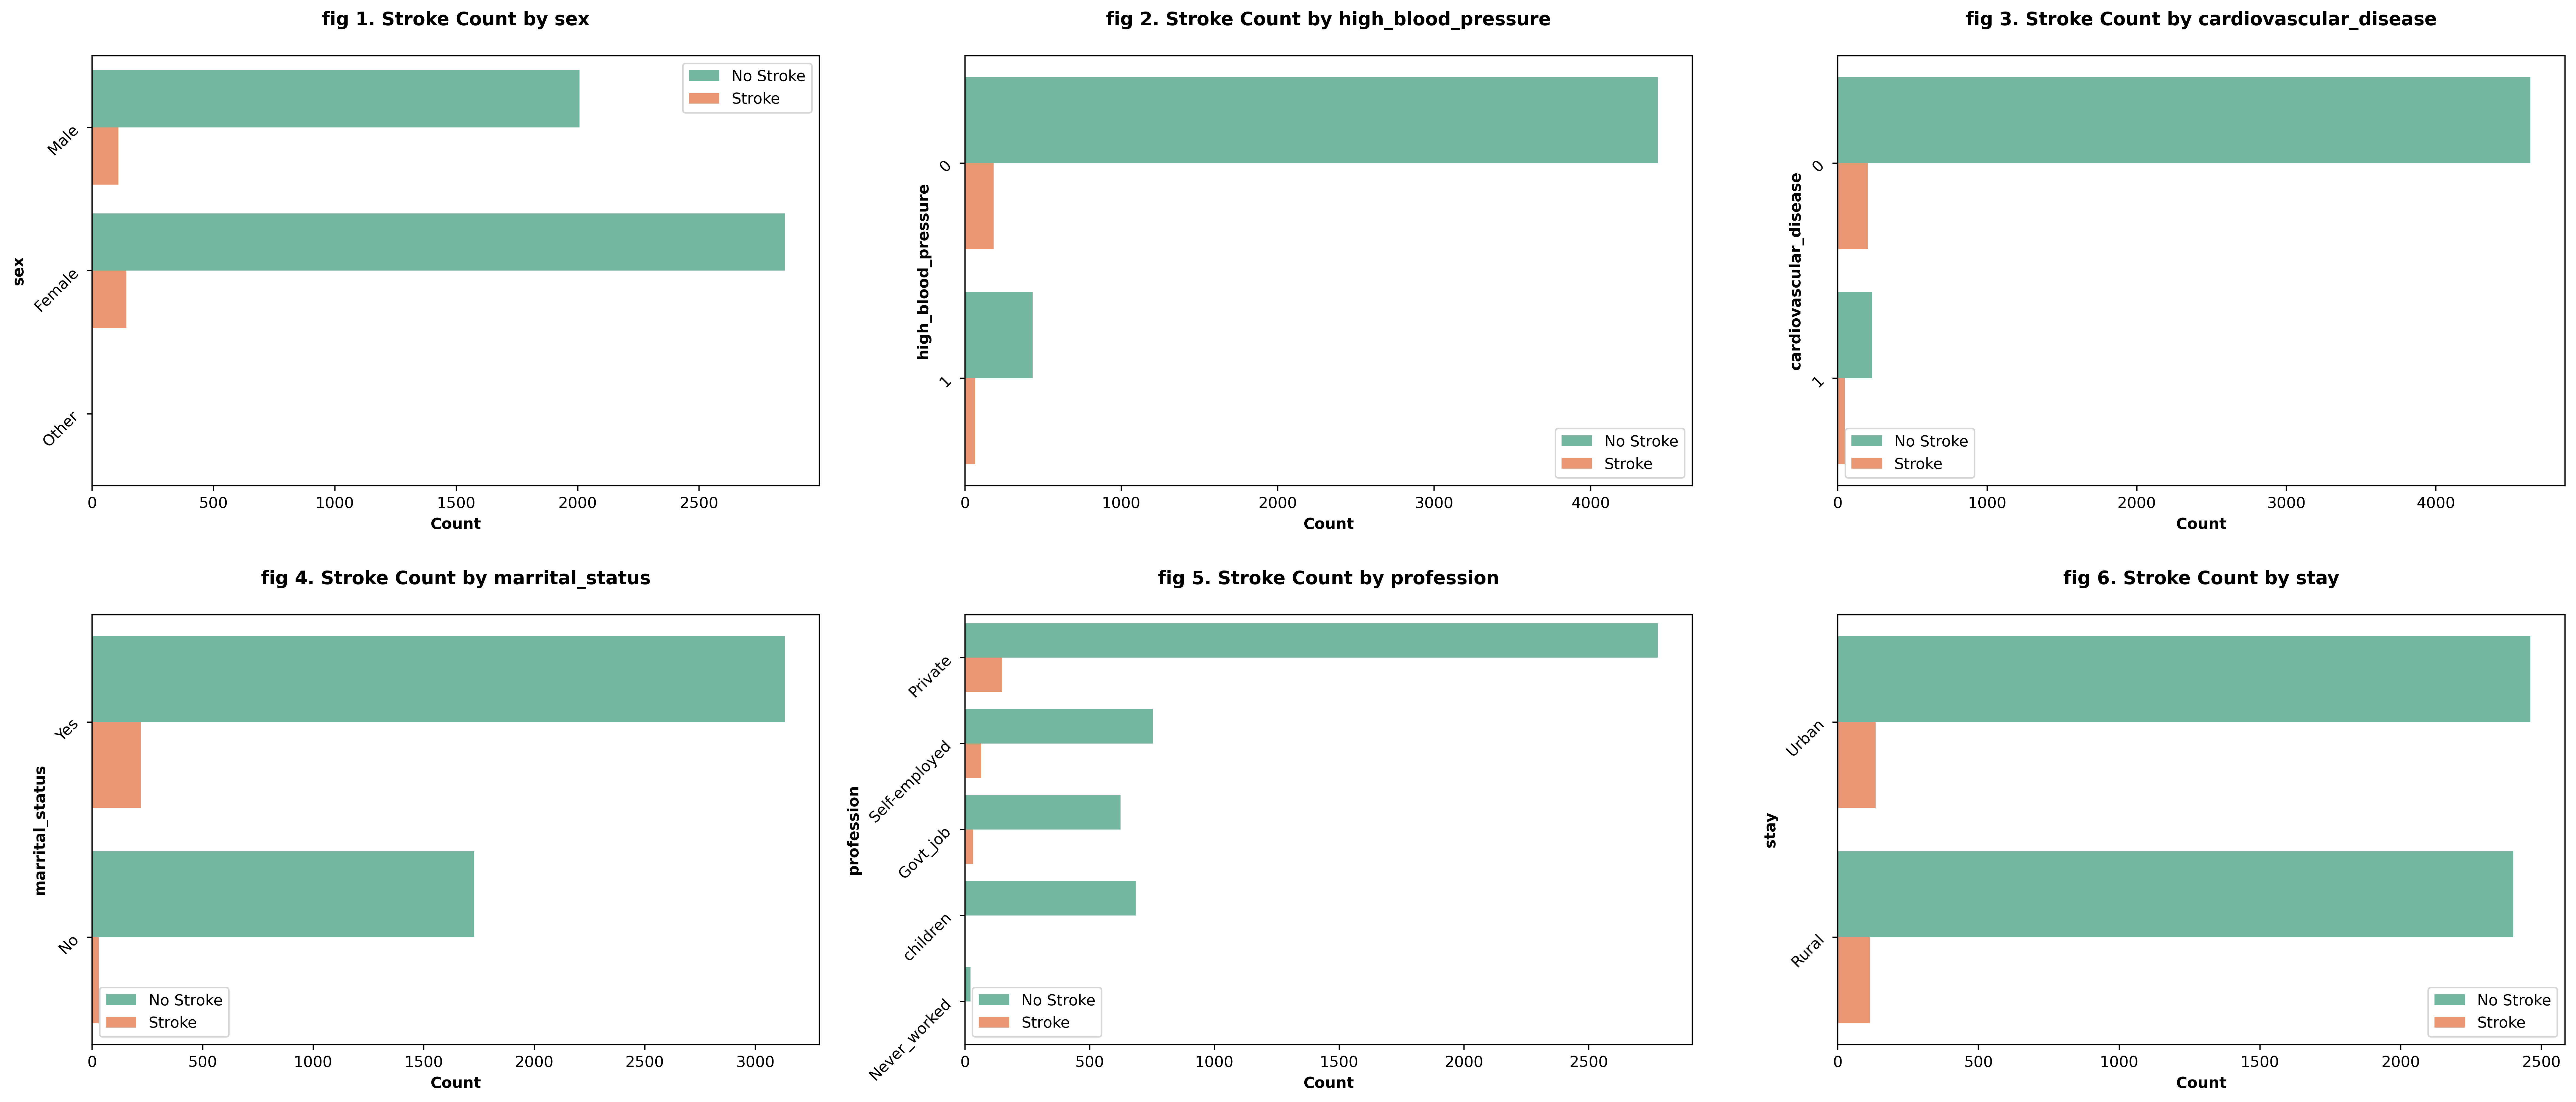

In [100]:
column_names = ['sex', 'high_blood_pressure', 'cardiovascular_disease', 'marrital_status', 'profession', 'stay']

plt.figure(figsize=(25, 18), dpi=400)

for index, columns in enumerate(column_names):
    pos = index+1
    plt.subplot(2, 3, pos)
    sns.countplot( y=  columns, data=dataset, hue='stroke', palette='Set2')
    plt.legend(labels=['No Stroke', 'Stroke'])
    plt.title(f'fig {pos}. Stroke Count by {columns}', fontweight='bold', pad=20)
    plt.ylabel(columns, fontweight='bold')
    plt.xlabel('Count', fontweight='bold')
    # plt.gca().set_yticklabels(dataset['work_type'], rotation=45)
    plt.yticks(rotation=45)


plt.subplots_adjust(hspace=0.3)
plt.subplots_adjust( wspace=0.2,top=0.6, left=0.1,  bottom=0.1, right=1)

plt.show(  )


Here mainly we need to focus on the 🟠 `orange` bar.
In this graph we try to find relationship between non numerical columns and their effect on having stroke. here we learn that

In fig 1. We can see that the likelyhood is higher amond females than compared to male. But it is not significantly impacting.
In fig 2. We can see how high bp is impacting olikelyhood of having stroke. It is more likely amond people who have high blood pressure. In fig 3. also we see a similar pattern as well for cardiovascular disease.
fig 4. is actually surprising where people who are married are very likely to get stroke. But I can understant why, because it includes people of other age as well, so it is understood that married people are very likely to get a stroke. fig 5. profession is also impacting the likelyhood of stroke, but I do not think inreal life this really matters a lot.. But in fig 6. It is very evident that stay does not have any  impact on the stroke. 


([0, 1, 2, 3],
 [Text(0, 0, 'formerly smoked'),
  Text(0, 1, 'never smoked'),
  Text(0, 2, 'smokes'),
  Text(0, 3, 'Unknown')])

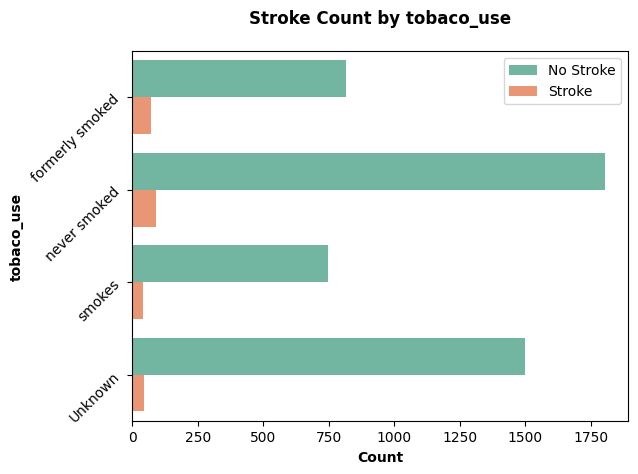

In [101]:
    # plt.subplot(2, 3, index+1)
columns = 'tobaco_use'
sns.countplot(y=columns, data=dataset, palette='Set2', hue='stroke')
plt.legend(labels=['No Stroke', 'Stroke'])
plt.title(f'Stroke Count by {columns}', fontweight='bold', pad=20)
plt.ylabel(columns, fontweight='bold')
plt.xlabel('Count', fontweight='bold')
# plt.gca().set_yticklabels(dataset['profession'], rotation=45)
plt.yticks(rotation=45)

In this figure we can see that how this dataset shows us that smoking has mixed effect on having a stroke. There is no specific trend what we see here.

All Values look fine, there are no unwanted/error values.

To summarize,
Features that `have less impact` on our target label are:
1. **sex**
2. **Resident_type**

Features which `have significant impact` on our target label are:
1. **high_blood_pressure**
2. **heart_desease**
3. **marrital_status**
4. **profession**

🤔 Let's confirm this using heatmap of correlation metrix

<Axes: >

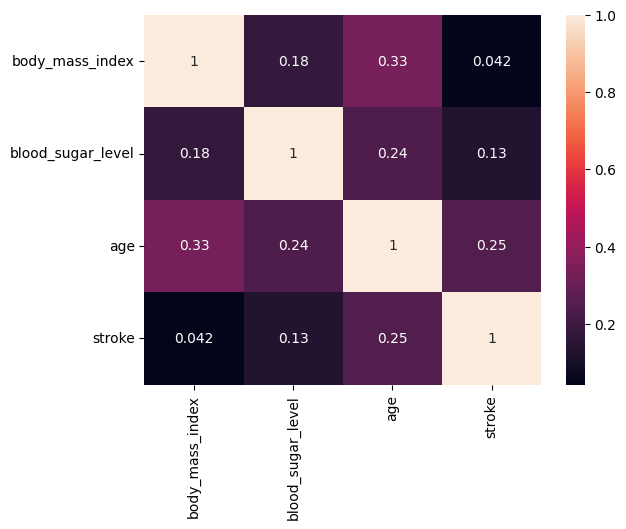

In [102]:
df_correlation = dataset[['body_mass_index', 'blood_sugar_level', 'age','stroke']]
df_cort = df_correlation.corr()
sns.heatmap(
    df_cort,   annot=True)

Here if you check against `stroke` and our three numerical columns you can see that value for `age:0.25` and `average_glucose_level:0.13` are more closer to 1 but `body_mass_index:0.042` is significantlly lower. Which confirms our earlier finding.

<a id='thoughts'></a>
## 💭 <span style="color: #20479b; font-weight: bold;">My thoughts on the dataset</span>

As per my initial Data Exploration,
- I can see that the dataset big enough to build a ML model.
- This dataset consits of null values in   `body_mass_index` column. Which I can delete it as it negligible rows of data and the body mass index cannot be `null`.
- I will be droping column `identity` as we do not need identity column while building a prediction model as will bring the accuracy down.
- We do have very less data for people who got stroke than in comparison to people to did not. Which makes it little imbalanced, so I will oversample the data.
- columns `body_mass_index`, `sex` and `resident_type` have less impact on the our target label
- Having said that the still have slight impact. Hence I will not delete them.
- Other than that the data looks pretty clean and I may not have to do a lot of data cleaning.
- As I will have to train the model and then later test it, I will be splitting our dataset into two parts. Training and Testing split.


Evaluation Metrics:
For this dataset I will be using, area under the curve, Accuracy, precision, F1 are the evaluation metrics.



Considering all these above points, I will be following the below steps to 

**⚙️ pre-process**
1. ❎ Drop all the rows containing `null` values
2. ❎ Drop columns `identity`
3. ➗ Spliting our main datset into two parts, one part for training and another for testing dataframe
    - Doing it before testing or 
    - to avoid data Scalling and oversampling.

**🔧 feature Engineer**
1. ⚖️ Scalling the numerical and categorical labels

2. 📈 Oversampling the data for stroke = 1, Because of two main reasons.
    - Our focus is on stroke detection and data for people who have stroke is very less.
    - We do not have to worry about data size as well here, since it's not very huge.

<a id='processing' ></a>
## ⚙️ <span style="color: #20479b; font-weight: bold;">Pre-processing the data</span>


1. ❎ Drop all the rows containing `null` values.

In [103]:
dataset = dataset.dropna()

In [104]:
print("Rows in this dataset   :", len(dataset))
print("="*30)

dataset.isnull().sum()

Rows in this dataset   : 4909


identity                  0
sex                       0
age                       0
high_blood_pressure       0
cardiovascular_disease    0
marrital_status           0
profession                0
stay                      0
blood_sugar_level         0
body_mass_index           0
tobaco_use                0
stroke                    0
dtype: int64

2. ❎ Drop columns `identity`.

In [105]:

dataset = dataset.iloc[:,[1,2,3,4,5,6,7,8,9,10,11]]
dataset.sample(10)

,sex,age,high_blood_pressure,cardiovascular_disease,marrital_status,profession,stay,blood_sugar_level,body_mass_index,tobaco_use,stroke
3948,Male,76.0,0,0,Yes,Self-employed,Rural,117.63,26.2,never smoked,0
772,Male,61.0,0,0,Yes,Private,Rural,55.26,33.2,Unknown,0
3530,Female,21.0,0,0,No,Private,Rural,85.86,35.4,Unknown,0
2085,Male,70.0,0,0,Yes,Private,Rural,72.56,30.4,formerly smoked,0
2824,Female,41.0,0,0,Yes,Private,Rural,97.41,25.5,never smoked,0
1030,Male,56.0,0,0,Yes,Private,Rural,156.18,25.3,smokes,0
902,Female,49.0,0,0,Yes,Self-employed,Urban,59.76,29.7,Unknown,0
3157,Female,64.0,1,0,Yes,Govt_job,Urban,211.12,22.0,never smoked,0
3666,Female,31.0,0,0,Yes,Self-employed,Rural,108.64,43.3,never smoked,0
4400,Male,35.0,0,0,Yes,Govt_job,Rural,103.08,41.5,smokes,0


3. ➗ Spliting our main datset into two parts, one part for training and another for testing dataframe

In [106]:
fet = dataset.iloc[:,[0,1,2,3,4,5,6,7,8,9]]
tar = dataset.iloc[:,[10]]

fet_train_df,  fet_test_df,   tar_train_df,  tar_test_df = sklearn.model_selection.train_test_split(  fet , tar  ,  test_size = 0.2,  shuffle=True,random_state  =  40)

print("Full dataset  size    :",dataset.shape)
print("Dataframe Features size for training:",fet_train_df.shape)
print("Dataframe Features size for training:",fet_test_df.shape)

Full dataset  size    : (4909, 11)
Dataframe Features size for training: (3927, 10)
Dataframe Features size for training: (982, 10)


- Here `fet` stands for our fetures dataset which will have X values.
- And `tar` stands for target dataset which will have Y values.
Here you can see that I can split the dta in 4:1 ratio. So that my model gets enough rows to learn the pattern and complexities. Dataframe X size for training is 3927, 10 and Dataframe Y size for training is 982, 10.


<a id='feature' ></a>
## 🔧 <span style="color: #20479b; font-weight: bold;">Feature Engineering</span>


1. ⚖️ Scalling the numerical and categorical labels

I will be using col transformer to apply scallling accross the dataset. I have chosed standard ccaleing for numeric columns and OneHotEncoder for categorical columns.

In [107]:
col_num = [ 'age', 
            'high_blood_pressure', 
            'cardiovascular_disease', 
            'blood_sugar_level', 
            'body_mass_index'
            ]
col_cat = ['sex', 
            'marrital_status',  
            'profession',  
            'stay',  
            'tobaco_use'
            ]

std_scaler = sklearn.preprocessing.StandardScaler()
one_htt = sklearn.preprocessing.OneHotEncoder(sparse_output=False, dtype=np.int64)

ct = sklearn.compose.ColumnTransformer([('std_scaler', std_scaler,col_num),('one_htt', one_htt,col_cat)],remainder='passthrough')
ct.fit(   fet_train_df )
ct.set_output( transform="pandas"  )
fet_train_df = ct.transform(  fet_train_df )
fet_test_df = ct.transform(   fet_test_df )

fet_test_df.sample(4)

,std_scaler__age,std_scaler__high_blood_pressure,std_scaler__cardiovascular_disease,std_scaler__blood_sugar_level,std_scaler__body_mass_index,one_htt__sex_Female,one_htt__sex_Male,one_htt__sex_Other,one_htt__marrital_status_No,one_htt__marrital_status_Yes,...,one_htt__profession_Never_worked,one_htt__profession_Private,one_htt__profession_Self-employed,one_htt__profession_children,one_htt__stay_Rural,one_htt__stay_Urban,one_htt__tobaco_use_Unknown,one_htt__tobaco_use_formerly smoked,one_htt__tobaco_use_never smoked,one_htt__tobaco_use_smokes
2023,-0.604827,-0.324922,-0.223607,0.080825,-0.604562,1,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0
207,1.554550,-0.324922,-0.223607,-0.337034,-0.249806,0,1,0,1,0,...,0,0,1,0,0,1,0,0,1,0
2562,0.717241,-0.324922,-0.223607,0.412231,-0.173787,1,0,0,0,1,...,0,1,0,0,1,0,1,0,0,0
2683,1.157930,-0.324922,-0.223607,-0.466039,-1.136696,1,0,0,0,1,...,0,1,0,0,1,0,1,0,0,0


2. 📈 Oversampling the data

In [108]:
mod_smote =  SMOTE(  )
fet_train_smot, tar_train_smot   =    mod_smote.fit_resample(
                                                            fet_train_df, 
                                                            tar_train_df)

print("fet_train_smot size :",fet_train_smot.shape)
print("tar_train_smot size :",tar_train_smot.shape)

fet_train_smot size : (7512, 21)
tar_train_smot size : (7512, 1)


In [109]:
tar_train_smot = tar_train_smot.squeeze()
tar_train_df

,stroke
1406,0
3245,0
2209,0
993,0
807,0
...,...
3771,0
4914,0
3499,0
3219,0


Text(0.5, 1.0, 'Proportion for stroke column')

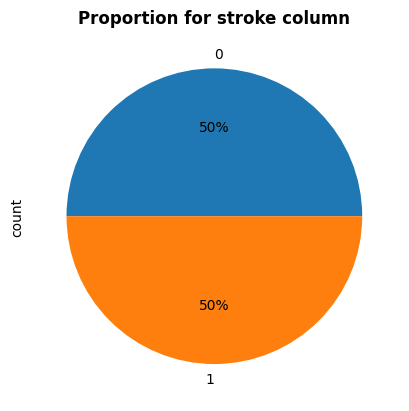

In [110]:
tar_train_smot.value_counts().plot(kind='pie',autopct='%1.0f%%')
plt.title('Proportion for stroke column', fontweight='bold')

It is now balanced as it's added synthetic data.

We can see that it had added more synthetic data to our dataset, which is good for us.

<a id='selection'></a>
## 🗂️ <span style="color: #20479b; font-weight: bold;">Selecting the best model for our dataset</span>

So I will be trying 5  models
1. Logistic Regression
4. Xgboost 
3. Random Forest
5. KNearestNeighbour
6. Support Vector 

I am fitting the model for `fet_train_smot` and `tar_train_smot`.
I will then analyze which model gives the best prediction. Then we can tune the models and optimize it even furture.

In [111]:

log_reg = sklearn.linear_model.LogisticRegression(max_iter=1200)
svc = sklearn.svm.SVC(  )
ran_for_cls =  sklearn.ensemble.RandomForestClassifier(  random_state = 1200)
xg_bst = XGBClassifier(  eval_metric = 'error'  )
k_n_n =   sklearn.neighbors.KNeighborsClassifier(    )


log_reg.fit(fet_train_smot,
            tar_train_smot)
svc.fit(fet_train_smot,
            tar_train_smot)
ran_for_cls.fit(fet_train_smot,
            tar_train_smot)
xg_bst.fit(fet_train_smot,
            tar_train_smot)
k_n_n.fit(fet_train_smot.values,
            tar_train_smot.values)

KNeighborsClassifier()

Here I assigned the model to each variable. So that we can later call it. And then I am fitting the models to the features and Target set of target dataframe.

<a id='assess'></a>
## ✅ <span style="color: #20479b; font-weight: bold;">Assessing which gives us the best results</span>

I want to choose the best-performing model. And the margin can be very very small hence I will create a list. And then I will keep appending the value metric list. I will loop through all the models that I have and then I will print the results according to the valuation metrics.

In [117]:
type(fet_test_df)

pandas.core.frame.DataFrame

In [140]:
val_met_list = []


mdl_list = [log_reg,svc,ran_for_cls,xg_bst,k_n_n]

for i, mdl in enumerate(mdl_list):

    if mdl==k_n_n:
        fet_train_smot_val = fet_train_smot.values
        tar_train_smot_val = tar_train_smot.values
        fet_test_df_val    = fet_test_df.values
    else:
        fet_train_smot_val = fet_train_smot
        tar_train_smot_val = tar_train_smot
        fet_test_df_val    = fet_test_df

    tar_pred_df = pd.Series(mdl.predict(
                                fet_test_df_val
                                ))


    val_met_list.append([ 
                        mdl.__class__.__name__,
                        cross_val_score(estimator=mdl, X=fet_train_smot_val, y=tar_train_smot_val, cv=15).mean(), 
                        accuracy_score(tar_test_df, tar_pred_df),
                        roc_auc_score(tar_test_df, tar_pred_df),
                        precision_score(tar_test_df, tar_pred_df),
                        f1_score(tar_test_df, tar_pred_df)
                        ])


val_met_df = pd.DataFrame(val_met_list
                        ,columns=['Model Name','Avg ACC','ACC','AUC','PRE','F1']
                        )
val_met_df = val_met_df.sort_values(
                                    ascending=False, by=['Avg ACC','ACC','AUC']
                                    )
val_met_df

,Model Name,Avg ACC,ACC,AUC,PRE,F1
2,RandomForestClassifier,0.972179,0.928717,0.508307,0.055556,0.054054
3,XGBClassifier,0.960737,0.925662,0.519347,0.073171,0.075949
1,SVC,0.931449,0.916497,0.501951,0.041667,0.046512
4,KNeighborsClassifier,0.929712,0.874745,0.568633,0.087379,0.127660
0,LogisticRegression,0.905089,0.921589,0.580369,0.145455,0.172043


Here we can see that Ran forest performed the best will the avegare acccuracy of 97.21, and AUC of 0.50.
Xgboost is the second best will the avegare acccuracy of 96.07, and AUC of 0.51.


As per our valuation metrics the best model out of them are
1. Random Forest
2. Xgboost

Let us try to tune these two models and try to find we can get the model to perform even better score.

<a id='tuning'></a>
## 🎛️ <span style="color: #20479b; font-weight: bold;">Hyper-Parameter Tuning</span>

I will using gridsearchcv and passing it multiple values so that it can choose a best value for us.

####  <span style=" font-weight: bold;">Random Forest Classifier</span>

In [139]:
params = {'criterion':['gini', 'log_loss'],'n_estimators':[60,80,100,120,140],  'random_state' : [1200,None]}
param_result_list = []
grid_ser_cv = GridSearchCV(ran_for_cls,params,cv=5)
grid_ser_cv.fit(fet_train_smot,tar_train_smot)
df_results = pd.DataFrame(grid_ser_cv.cv_results_)
param_result_list.append([grid_ser_cv.best_score_,grid_ser_cv.best_params_])

param_result_df = pd.DataFrame(param_result_list, columns=['best_score_','best_params_',])
param_result_df

,best_score_,best_params_
0,0.970583,"{'criterion': 'gini', 'n_estimators': 80, 'ran..."


####  <span style=" font-weight: bold;">Support Vector Classifier</span>

In [141]:
params = {'eta':[0.1,0.4,0.2,0.3],'booster':['dart','gblinear', 'gbtree']}
param_result_list = []
grid_ser_cv = GridSearchCV(xg_bst,params,cv=5)
grid_ser_cv.fit(x_train_smot,y_train_smot)
df_results = pd.DataFrame(grid_ser_cv.cv_results_)
param_result_list.append([grid_ser_cv.best_score_,grid_ser_cv.best_params_])

param_result_df = pd.DataFrame(param_result_list, columns=['best_score_','best_params_',])
param_result_df

,best_score_,best_params_
0,0.961667,"{'booster': 'gbtree', 'eta': 0.3}"


When we look at the scores of `random_forect_classifier` and `svm` model, we can come to a conclusion that both are a great model for this dataset.  
Having said that `random_forect_classifier` model perfomed sligtly better. Hence I willl choose that as my final model with `{'criterion': 'gini', 'n_estimators': 80, 'random_state': None}` as the hyperparameters.

<a id='Final'></a>
## 🏁 <span style="color: #20479b; font-weight: bold;">Final Model</span>

In [143]:
final_ran_for_cls =  sklearn.ensemble.RandomForestClassifier(criterion= 'log_loss', n_estimators= 60,  random_state = None)
final_ran_for_cls.fit(fet_train_smot,
            tar_train_smot
            )
y_pred_ran_for_cls = final_ran_for_cls.predict(
                                         fet_test_df
                                         )
print('Random Forest')
print('='*53)
print('AVG ACC }',cross_val_score(estimator=log_reg, X=fet_train_smot, y=tar_train_smot, cv=5).mean())
print('PRE     }',precision_score(tar_test_df, y_pred_ran_for_cls))
print('ACC     }',accuracy_score(tar_test_df, y_pred_ran_for_cls))
print('F1S     }',f1_score(tar_test_df, y_pred_ran_for_cls))
print('AUS     }',roc_auc_score(tar_test_df, y_pred_ran_for_cls))


Random Forest
AVG ACC } 0.9044252374080068
PRE     } 0.05405405405405406
ACC     } 0.9276985743380856
F1S     } 0.05333333333333334
AUS     } 0.5077776538804638


<a id='conclusion'></a>
## 💡 <span style="color: #20479b; font-weight: bold;">Conclusion</span>

To summarize everythin we did
- we started with loading the dataset
- In our eda we noticed that
    - identity column was unnessary.
    - body_mass_index column had null values.
    - dataset was pretty imbalanced.
- cleaned the data, by deleting null rows, dropping identity column, and split the data to avoid data leakage.
- And then we scaled the numerical and categorical values.
- oversampled the data using smote.

I tried 5 different model. Out of which `random forest classifier` and `xgboost` model performed the best.  
I tuned tuned the hyper parameters using `gridsearchCV` and found that amond both the models, `random forest classifier` outperformed `xgboost` slightly.

As per the valuation metrics I  found `random forest classifier` with `{'C': 1.4, 'degree': 4, 'kernel': 'poly'}` parameters provided the best with pretty good acccuracy of 93%.

With this model in place, now my company can use this model to take inputs from the users and prompt them if there are chances of getting a stroke for them. This solves the problem that we stated before. This will significantly help the users in reducing the rist of strokes, and notify them to get medical help as soon as possible.

I felt that if the data has more parametrics we could have improved more. Also `body_mass_index` of a person does impact on the chances of getting an stroke, but in this dataset it did not show the signs of it. Hence it will be better if data collection is done even more accurately to improve the accuracy of the model.

